In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import sys

from scipy import interpolate

sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from GC_Orbit_class import GCorbit

%matplotlib inline

In [2]:
#data: need actions J_r, J_phi, J_theta
if 0:
    r_3d,x,y,z,vx,vy,vz=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_sophia_neu.dat', usecols=(1,9,10,29,30,31,32,33,34), unpack=True)
else:
    r_3d,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,30,31,32,33,34,35), unpack=True)

In [3]:
r,rho=np.loadtxt('densityfile_wo_bh.txt', usecols=(1,2), unpack=True)

bh_sample=GCorbit(inputfilename='densityfile_wo_bh.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [4]:
r3d,J_phi,J_theta,J_r=np.loadtxt('actions_wo_bh.txt')

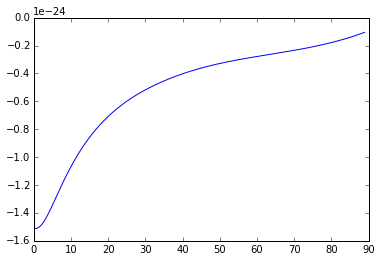

In [27]:
plt.plot(r_3d,bh_sample.potential(r=r_3d))

In [23]:
np.sum(m1+m2)

172671.28114100007

In [5]:
len(J_theta)

468627

In [14]:
print(J_theta)

[  1.78262653   8.89482566  30.81918018 ...,  18.86808535  17.68969592
  12.26367554]


In [15]:
#fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x,y,z) #zu testzwecken mit x,y,z; eigentlich J_phi,J_theta,J_r
#ax.set_xlabel("J_phi") #einheit
#ax.set_ylabel('J_theta') #einheit
#ax.set_zlabel("J_r") #einheit
#ax.set_title('actions')
#fig.savefig('./Plots/action_scatter_3d')

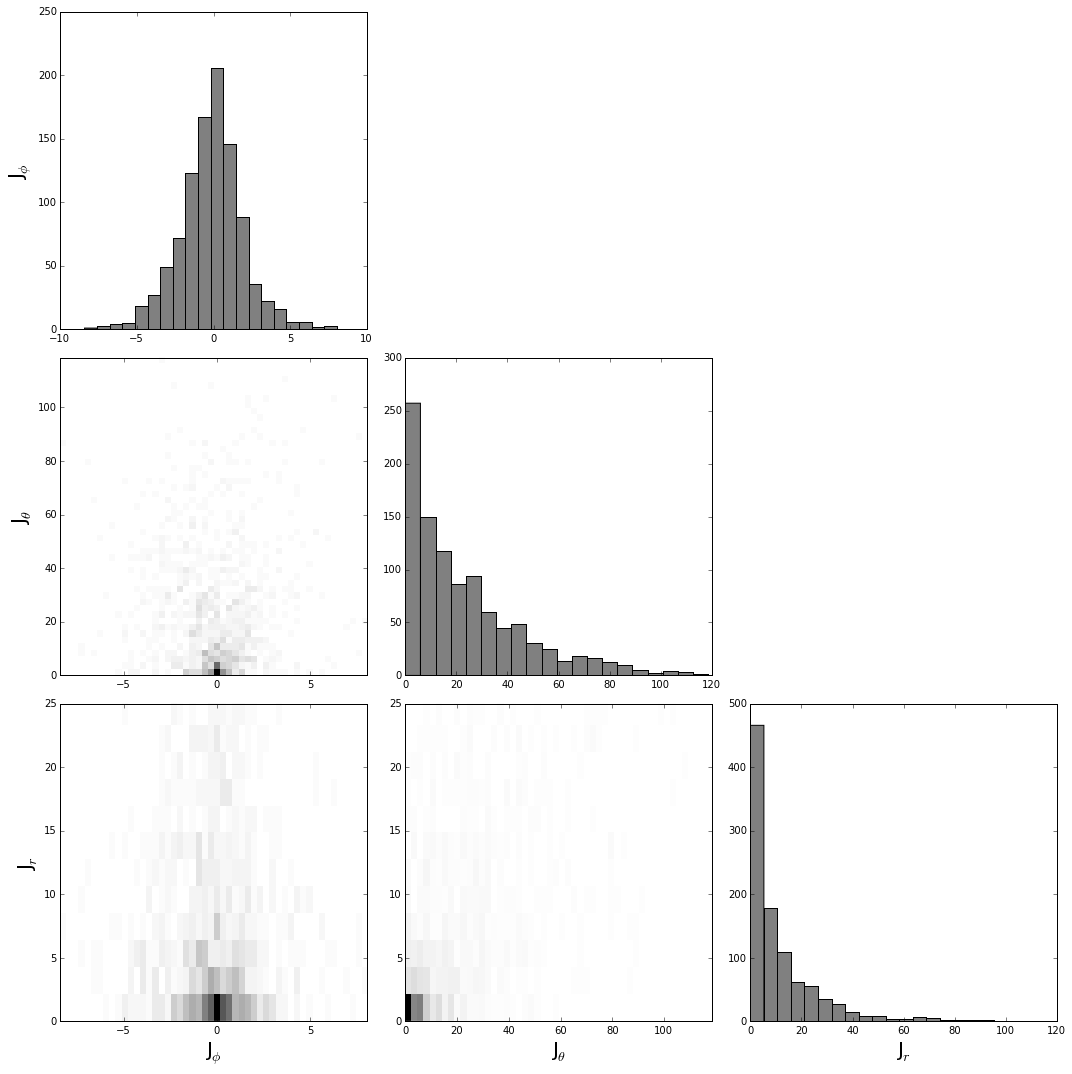

In [16]:
##### Versuch vom Triangle Plot

#optimal bin width: Scott's normal reference rule h=3.5*sigma/n^(1/3)

#h_phi_1=np.std(J_phi)*3.5/(len(J_phi))**(1/3)
#h_theta_1=np.std(J_theta)*3.5/(len(J_theta))**(1/3)
#h_r_1=np.std(J_r)*3.5/(len(J_r))**(1/3)
#print(int(h_phi_1),int(h_theta_1),int(h_r_1))

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
n0, bins0, patches0=axes[0,0].hist(J_phi[0:1000],20,color='grey') 
n1, bins1, patches1=axes[1,1].hist(J_theta[0:1000],20,color='grey') 
n2, bins2, patches2=axes[2,2].hist(J_r[0:1000],20,color='grey') 
H0, xedges0, yedges0, img0 = axes[1,0].hist2d(J_phi[0:1000], J_theta[0:1000], bins=50,cmap='Greys') 
H1, xedges1, yedges1, img0 = axes[2,1].hist2d(J_theta[0:1000], J_r[0:1000], bins=50, cmap='Greys') 
H2, xedges2, yedges2, img0 = axes[2,0].hist2d(J_phi[0:1000], J_r[0:1000], bins=50,cmap='Greys') 

axes[0,1].axis('off')
axes[0,2].axis('off')
axes[1,2].axis('off')

#axes[1,0].set_xlim(-50,50)
#axes[1,0].set_ylim(0,50)
#axes[2,0].set_xlim(-50,50)
axes[2,0].set_ylim(0,25)
#axes[2,1].set_xlim(0,50)
axes[2,1].set_ylim(0,25)
axes[2,0].set_xlabel('J$_\phi$', fontsize=20)
axes[2,1].set_xlabel('J$_\\theta$', fontsize=20)
axes[2,2].set_xlabel('J$_r$', fontsize=20)
axes[1,0].set_ylabel('J$_\\theta$', fontsize=20)
axes[2,0].set_ylabel('J$_r$', fontsize=20)
axes[0,0].set_ylabel('J$_\phi$', fontsize=20)


#fig.subplots_adjust(hspace=0.1,wspace=0.1)
fig.tight_layout()
#achsen genau übereinander


anpassen:
---
-binwidth

-histogram grenzen

-ticks

-beschriftung der ticks


In [17]:
#plot mean J_r over r


In [22]:
def action_corner_plot(J_phi,J_theta,J_r):
    fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
    n0, bins0, patches0=axes[0,0].hist(J_phi[0:1000],20,color='grey') 
    n1, bins1, patches1=axes[1,1].hist(J_theta[0:1000],20,color='grey') 
    n2, bins2, patches2=axes[2,2].hist(J_r[0:1000],20,color='grey') 
    H0, xedges0, yedges0, img0 = axes[1,0].hist2d(J_phi[0:1000], J_theta[0:1000], bins=50,cmap='Greys') 
    H1, xedges1, yedges1, img0 = axes[2,1].hist2d(J_theta[0:1000], J_r[0:1000], bins=50, cmap='Greys') 
    H2, xedges2, yedges2, img0 = axes[2,0].hist2d(J_phi[0:1000], J_r[0:1000], bins=50,cmap='Greys') 

    axes[0,1].axis('off')
    axes[0,2].axis('off')
    axes[1,2].axis('off')

    #axes[1,0].set_xlim(-50,50)
    #axes[1,0].set_ylim(0,50)
    #axes[2,0].set_xlim(-50,50)
    axes[2,0].set_ylim(0,25)
    #axes[2,1].set_xlim(0,50)
    axes[2,1].set_ylim(0,25)
    axes[2,0].set_xlabel('J$_\phi$', fontsize=20)
    axes[2,1].set_xlabel('J$_\\theta$', fontsize=20)
    axes[2,2].set_xlabel('J$_r$', fontsize=20)
    axes[1,0].set_ylabel('J$_\\theta$', fontsize=20)
    axes[2,0].set_ylabel('J$_r$', fontsize=20)
    axes[0,0].set_ylabel('J$_\phi$', fontsize=20)


    #fig.subplots_adjust(hspace=0.1,wspace=0.1)
    fig.tight_layout()
    #achsen genau übereinander
    return fig

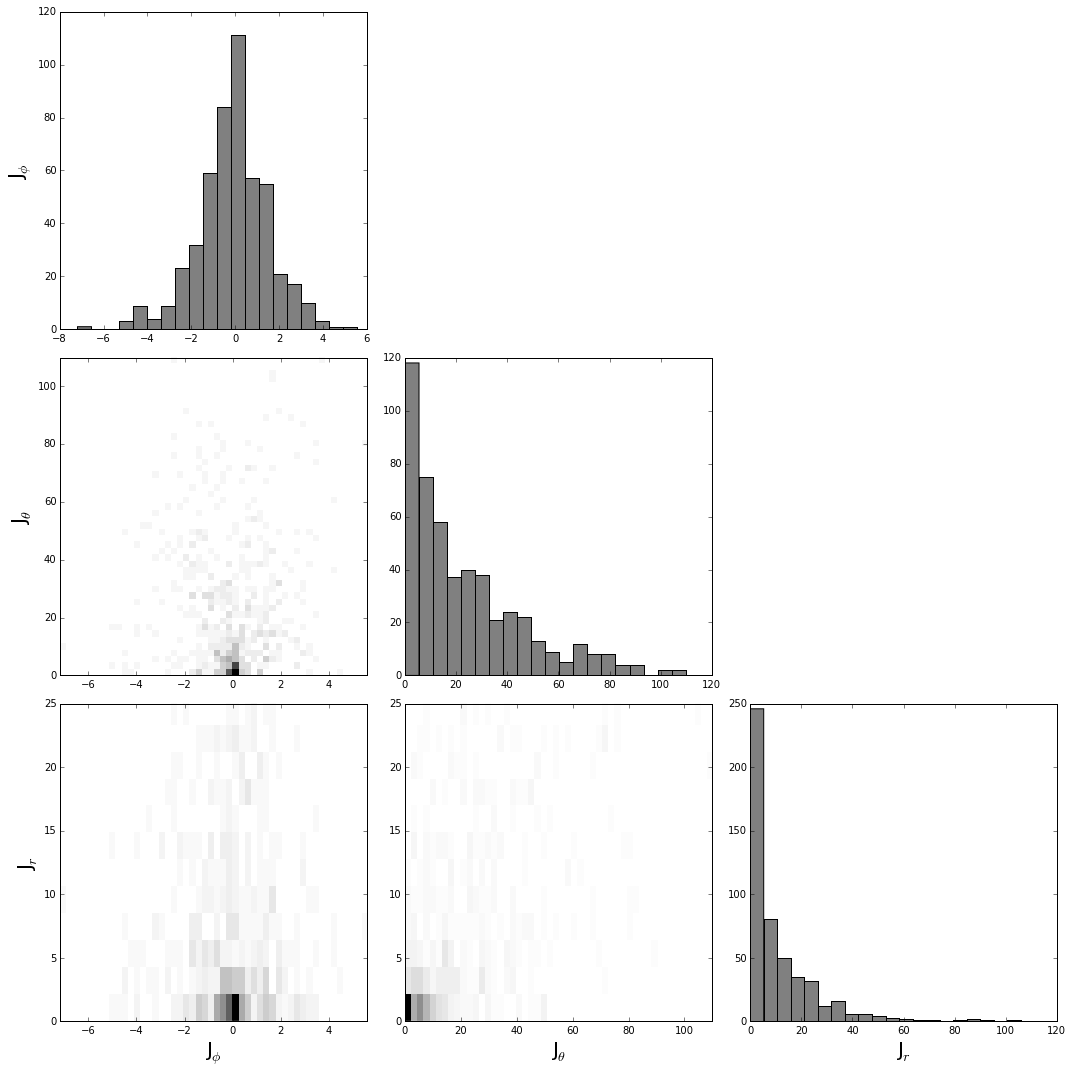

In [20]:
action_corner_plot(J_phi[0:500],J_theta[0:500],J_r[0:500])

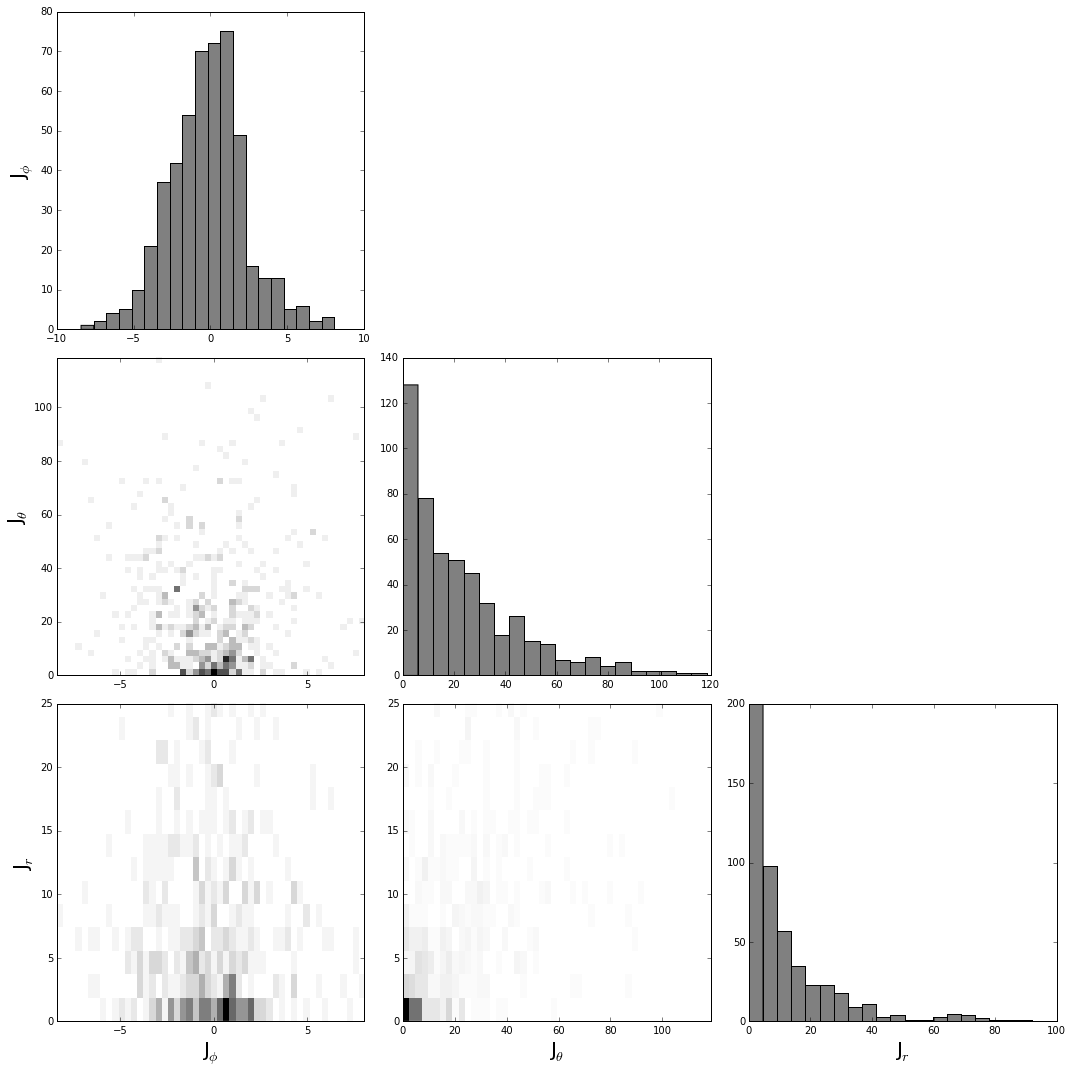

In [21]:
action_corner_plot(J_phi[500:1000],J_theta[500:1000],J_r[500:1000])